In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
DATA_PATH = '../../../data/'
PLOT_PATH = 'plots/'

In [10]:
original_set = pd.read_pickle(DATA_PATH + 'train_data.pkl')
original_set.head()
sampled_set = original_set.sample(frac=1)

Removing unnecessary features

In [11]:
data = sampled_set.drop(['has_MCParticle_not_electron', 'is_downstream_reconstructible_not_electron', 'is_true_seed'], axis=1)
data = data.drop(data[~data['has_MCParticle']].index,axis=0)
data = data.drop(['has_MCParticle'], axis=1)

In [11]:
# %%writefile data_utils/dropFalseMCParticles.py
from sklearn.base import BaseEstimator, TransformerMixin
class dropFalseMCParticles(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data = data.drop(data[~data['has_MCParticle']].index, axis=0)
        return data   

In [12]:
# %%writefile data_utils/dropUnnecessaryFeatures.py
from sklearn.base import BaseEstimator, TransformerMixin
class dropUnnecessaryFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data = data.drop(['has_MCParticle','has_MCParticle_not_electron', 'is_downstream_reconstructible_not_electron', 'is_true_seed'], axis=1)
        return data   

creating copy of the data 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data_renamed_columns = {column:column.replace("_", "\_") for column in data.columns}

In [42]:
data.rename(columns=data_renamed_columns).columns

Index(['index', 'is\_downstream\_reconstructible', 'seed\_chi2PerDoF',
       'seed\_p', 'seed\_pt', 'seed\_nLHCbIDs', 'seed\_nbIT', 'seed\_nLayers',
       'seed\_x', 'seed\_y', 'seed\_tx', 'seed\_ty', 'seed\_mva\_value'],
      dtype='object')

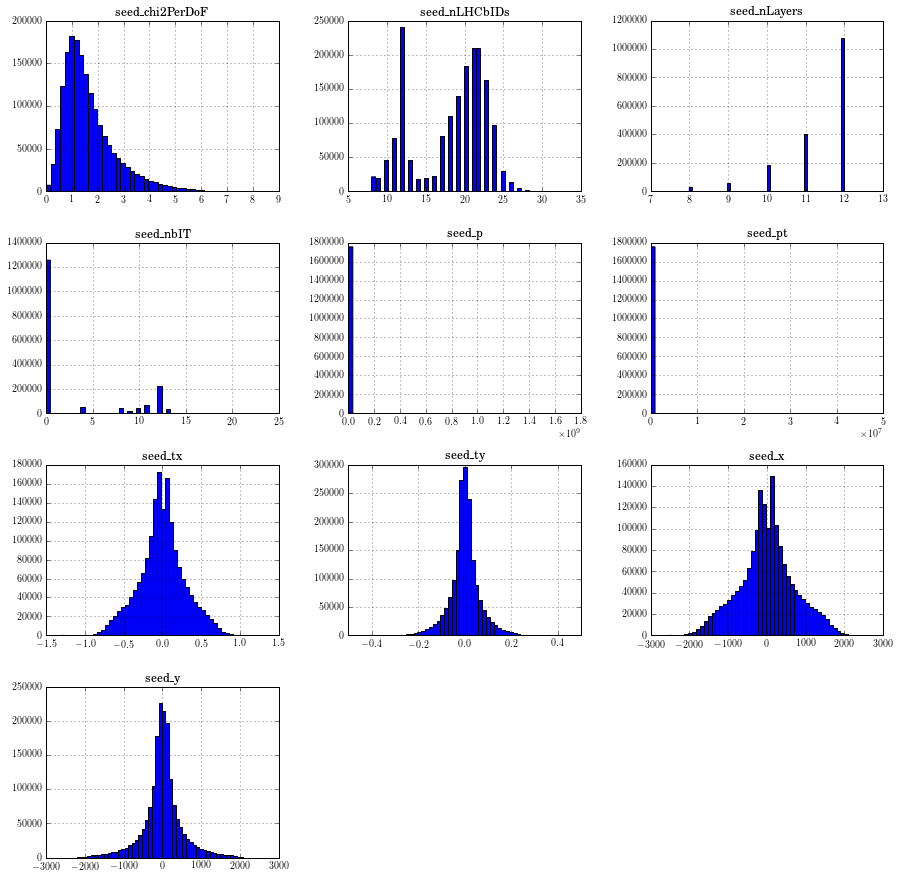

In [46]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
data.drop(['index', 'is_downstream_reconstructible', 'seed_mva_value'],axis=1).rename(columns=data_renamed_columns).hist(bins=50, figsize=(15,15))
plt.savefig(PLOT_PATH + 'features_hist.eps')

In [15]:
corr_matrix = data.drop(['index'],axis=1).corr()
corr_matrix

,is_downstream_reconstructible,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty,seed_mva_value
is_downstream_reconstructible,1.000000,-0.021910,-0.008608,-0.009297,0.372679,-0.349769,0.189261,0.005091,0.003631,0.006811,0.003001,0.612842
seed_chi2PerDoF,-0.021910,1.000000,0.002993,0.008156,0.055210,-0.230316,-0.239027,-0.004883,0.004546,-0.019835,0.004028,-0.137091
seed_p,-0.008608,0.002993,1.000000,0.883282,-0.013916,0.010034,-0.013590,-0.000296,0.000150,0.000151,-0.000159,-0.007291
seed_pt,-0.009297,0.008156,0.883282,1.000000,-0.008269,0.003174,-0.012897,0.000746,0.003039,0.000429,0.002949,-0.005387
seed_nLHCbIDs,0.372679,0.055210,-0.013916,-0.008269,1.000000,-0.841469,0.404723,-0.005888,0.001834,-0.008266,0.000838,0.489938
seed_nbIT,-0.349769,-0.230316,0.010034,0.003174,-0.841469,1.000000,-0.033813,0.004281,0.000144,0.010059,0.000572,-0.444779
seed_nLayers,0.189261,-0.239027,-0.013590,-0.012897,0.404723,-0.033813,1.000000,0.029748,0.001543,0.034013,0.001795,0.258481
seed_x,0.005091,-0.004883,-0.000296,0.000746,-0.005888,0.004281,0.029748,1.000000,-0.005700,0.855634,-0.000428,0.002605
seed_y,0.003631,0.004546,0.000150,0.003039,0.001834,0.000144,0.001543,-0.005700,1.000000,-0.004321,0.953431,0.000170
seed_tx,0.006811,-0.019835,0.000151,0.000429,-0.008266,0.010059,0.034013,0.855634,-0.004321,1.000000,0.002751,0.003313


In [16]:
corr_matrix['is_downstream_reconstructible'].sort_values(ascending=False)

is_downstream_reconstructible    1.000000
seed_mva_value                   0.612842
seed_nLHCbIDs                    0.372679
seed_nLayers                     0.189261
seed_tx                          0.006811
seed_x                           0.005091
seed_y                           0.003631
seed_ty                          0.003001
seed_p                          -0.008608
seed_pt                         -0.009297
seed_chi2PerDoF                 -0.021910
seed_nbIT                       -0.349769
Name: is_downstream_reconstructible, dtype: float64

#### 1. 'is_downstream_reconstructible' - our class to predict

In [17]:
data['is_downstream_reconstructible'].value_counts()/len(data)

True     0.595233
False    0.404767
Name: is_downstream_reconstructible, dtype: float64

In [18]:
data['is_downstream_reconstructible'].describe()

count     175333
unique         2
top         True
freq      104364
Name: is_downstream_reconstructible, dtype: object

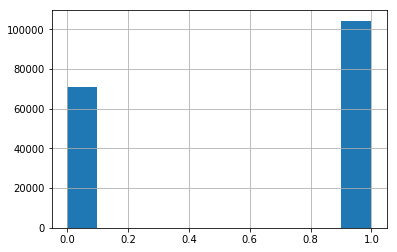

In [19]:
data['is_downstream_reconstructible'].hist()

#### 2.1 seed_chi2PerDoF	

In [20]:
data['seed_chi2PerDoF'].describe()

count    175333.000000
mean          1.661977
std           1.040439
min           0.005874
25%           0.943966
50%           1.398158
75%           2.094288
max           8.961133
Name: seed_chi2PerDoF, dtype: float64

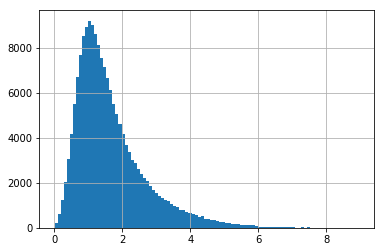

In [21]:
data['seed_chi2PerDoF'].hist(bins=100)

#### 2.2 Creating transformer for seed_chi2PerDoF

In [22]:
# %%writefile data_utils/chi2PerDoFScaler.py
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class chi2PerDoFScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        chi2 = data['seed_chi2PerDoF']
        chi2 = np.sqrt(chi2)
        chi2 -= np.mean(chi2)
        chi2 /= np.std(chi2)
        data['seed_chi2PerDoF'] = chi2
        return data
    


count    1.753330e+05
mean     4.906807e-16
std      1.000003e+00
min     -3.074804e+00
25%     -6.953197e-01
50%     -1.346870e-01
75%      5.691778e-01
max      4.680641e+00
Name: seed_chi2PerDoF, dtype: float64


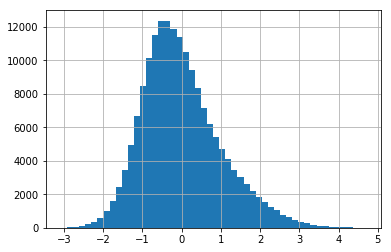

In [23]:
c2pdof_scaler = chi2PerDoFScaler()
scaled_set = data.copy()
scaled_set = c2pdof_scaler.fit_transform(data)
print(scaled_set['seed_chi2PerDoF'].describe())
scaled_set['seed_chi2PerDoF'].hist(bins=50)

# 3.1 seed_p

In [24]:
data['seed_p'].describe()

count    1.753330e+05
mean     2.445451e+04
std      1.872216e+06
min      1.199211e+03
25%      3.514125e+03
50%      6.705318e+03
75%      1.485417e+04
max      7.137781e+08
Name: seed_p, dtype: float64

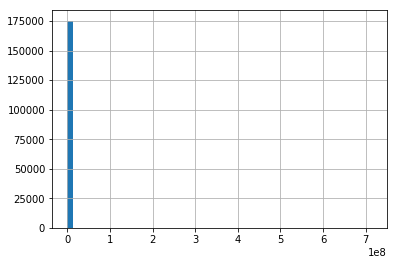

In [25]:
data['seed_p'].hist(bins=50)

#### 3.1 seed_p scale

In [26]:
# %%writefile data_utils/pScale.py
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class pScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        p = np.log10(data['seed_p'])
        p -= np.mean(p)
#         p /= np.std(p)
        data['seed_p'] = p
        return data

count    1.753330e+05
mean    -7.661516e-16
std      4.399461e-01
min     -8.112151e-01
25%     -3.442935e-01
50%     -6.369142e-02
75%      2.817377e-01
max      4.963452e+00
Name: seed_p, dtype: float64


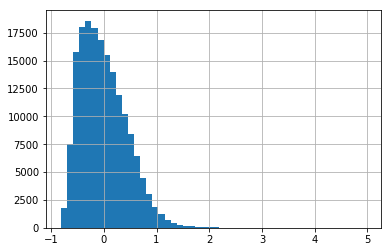

In [27]:
p_scaler = pScale()
scaled_set = p_scaler.fit_transform(data)
print(scaled_set['seed_p'].describe())
scaled_set['seed_p'].hist(bins=50)

# 4.1 seed_pt

In [28]:
data['seed_pt'].describe()

count    1.753330e+05
mean     1.786780e+03
std      5.693650e+04
min      9.584175e+00
25%      9.986362e+02
50%      1.165004e+03
75%      1.415766e+03
max      1.630378e+07
Name: seed_pt, dtype: float64

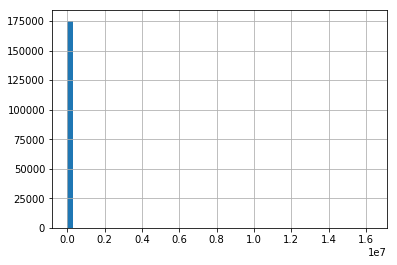

In [29]:
data['seed_pt'].hist(bins=50)

#### 4.2 pt scale

In [30]:
# %%writefile data_utils/ptScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class ptScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        pt = np.log10(data['seed_pt'])
        pt -= np.mean(pt)
        pt /= np.std(pt)
        data['seed_pt'] = pt
        return data

count    1.753330e+05
mean    -8.680525e-16
std      1.000003e+00
min     -1.015935e+01
25%     -4.031470e-01
50%     -7.959173e-02
75%      3.297533e-01
max      1.996589e+01
Name: seed_pt, dtype: float64


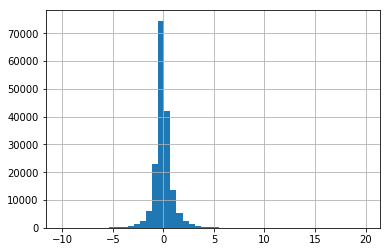

In [31]:
pt_scaler = ptScale()
scaled_set = pt_scaler.fit_transform(data)
print(scaled_set['seed_pt'].describe())
scaled_set['seed_pt'].hist(bins=50)

# 5.1  seed_nLHCbIDs

In [32]:
data['seed_nLHCbIDs'].value_counts(normalize=True)

12    0.135770
21    0.120628
22    0.120428
20    0.102559
23    0.093394
19    0.079939
18    0.063137
24    0.055529
17    0.045434
11    0.043432
13    0.026184
10    0.026025
25    0.017264
16    0.012970
8     0.012308
9     0.011487
15    0.011019
14    0.010494
26    0.007580
27    0.003063
28    0.000952
29    0.000297
30    0.000091
31    0.000017
Name: seed_nLHCbIDs, dtype: float64

In [33]:
data['seed_nLHCbIDs'].describe()

count    175333.000000
mean         18.321320
std           4.617512
min           8.000000
25%          13.000000
50%          20.000000
75%          22.000000
max          31.000000
Name: seed_nLHCbIDs, dtype: float64

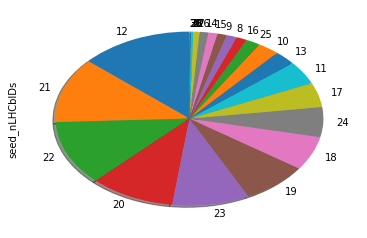

In [34]:
data['seed_nLHCbIDs'].value_counts(normalize=True).plot.pie(shadow=True, startangle=90)

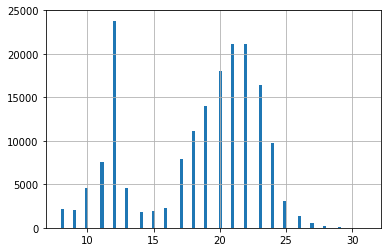

In [35]:
data['seed_nLHCbIDs'].hist(bins=100)

#### 5.2 nLHCbIDs scale transformer

In [36]:
# %%writefile data_utils/nLHCbIDsScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class nLHCbIDsScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        return data

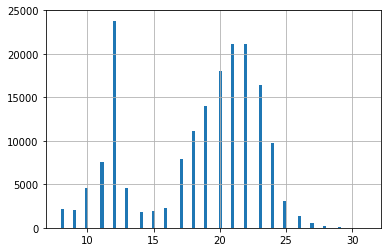

In [37]:
nLHCBIDS_scaler = nLHCbIDsScale()
scaled_set = nLHCBIDS_scaler.fit_transform(data)
scaled_set['seed_nLHCbIDs'].hist(bins=100)

#### 6.1  seed_nLayers

In [38]:
data['seed_nLayers'].value_counts(normalize=True)*100

12    61.569699
11    22.905557
10    10.697359
9      3.209892
8      1.617494
Name: seed_nLayers, dtype: float64

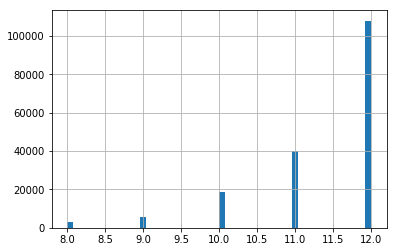

In [39]:
data['seed_nLayers'].hist(bins=50)

In [40]:
data['seed_nLayers'].describe()

count    175333.000000
mean         11.396001
std           0.916422
min           8.000000
25%          11.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: seed_nLayers, dtype: float64

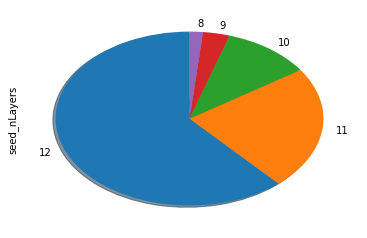

In [41]:
data['seed_nLayers'].value_counts(normalize=True).plot.pie(shadow=True, startangle=90)

# 6.2 nLayers scale

In [42]:
# %%writefile data_utils/nLayersScale.py
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class nLayersScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        return data

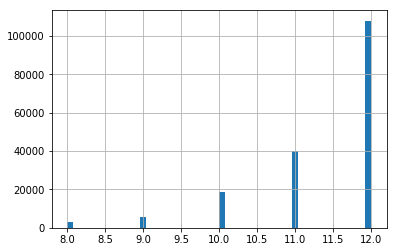

In [43]:
nLayers_scaler = nLayersScale()
scaled_set = nLayers_scaler.fit_transform(data)
scaled_set['seed_nLayers'].hist(bins=50)

# 7.1 seed_nbIT

In [44]:
data['seed_nbIT'].value_counts(normalize=True)*100

0     71.741771
12    12.886336
11     3.797916
4      3.038789
8      2.424529
10     2.264833
13     1.896391
9      1.243348
14     0.213308
7      0.208175
5      0.132320
6      0.088974
15     0.029658
3      0.017110
16     0.009696
17     0.002852
2      0.002852
18     0.001141
Name: seed_nbIT, dtype: float64

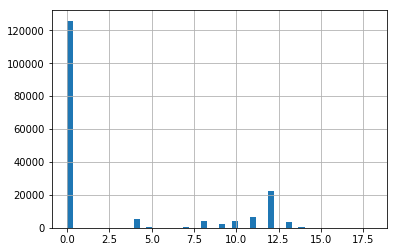

In [45]:
data['seed_nbIT'].hist(bins=50)

In [46]:
data['seed_nbIT'].describe()

count    175333.000000
mean          2.928211
std           4.876742
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max          18.000000
Name: seed_nbIT, dtype: float64

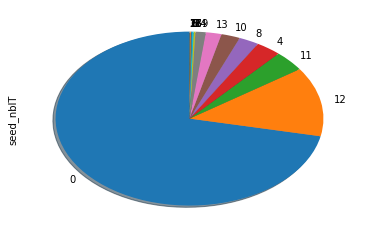

In [47]:
data['seed_nbIT'].value_counts(normalize=True).plot.pie(shadow=True, startangle=90)

In [48]:
# %%writefile data_utils/nbITScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class nbITScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        return data

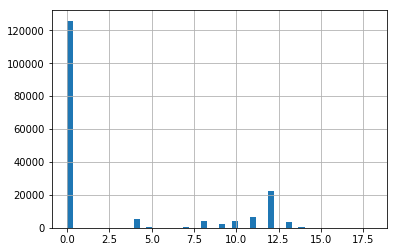

In [49]:
nbIT_scaler = nbITScale()
scaled_set = nbIT_scaler.fit_transform(data)
scaled_set['seed_nbIT'].hist(bins=50)

# 8.1 seed_tx

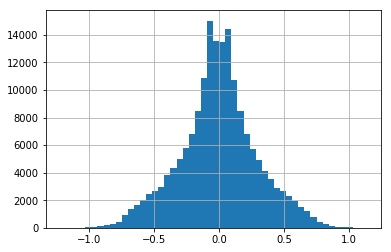

In [50]:
data['seed_tx'].hist(bins=50)

In [51]:
data['seed_tx'].describe()

count    175333.000000
mean         -0.005070
std           0.296259
min          -1.216345
25%          -0.170004
50%          -0.005547
75%           0.160759
max           1.122777
Name: seed_tx, dtype: float64

#### 8.2 seed_tx scaler

In [52]:
# %%writefile data_utils/txScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class txScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        tx = data['seed_tx']
        tx -= np.mean(tx)
        tx /= np.std(tx)
        data['seed_tx'] = tx
        return data

count    1.753330e+05
mean    -1.298837e-17
std      1.000003e+00
min     -4.088573e+00
25%     -5.567232e-01
50%     -1.610829e-03
75%      5.597454e-01
max      3.806970e+00
Name: seed_tx, dtype: float64


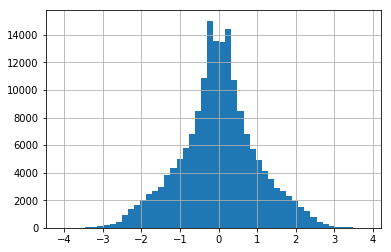

In [53]:
tx_scaler = txScale()
scaled_set = tx_scaler.fit_transform(data)
print(scaled_set['seed_tx'].describe())
scaled_set['seed_tx'].hist(bins=50)

# 9.1 seed_ty

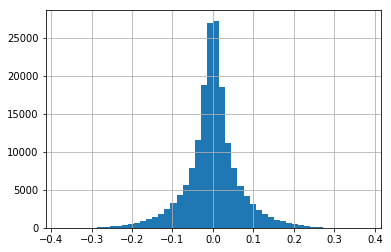

In [54]:
data['seed_ty'].hist(bins=50)

In [55]:
data['seed_ty'].describe()

count    1.753330e+05
mean    -8.264369e-07
std      6.496713e-02
min     -3.755897e-01
25%     -2.796423e-02
50%      1.995081e-04
75%      2.803654e-02
max      3.764981e-01
Name: seed_ty, dtype: float64

#### 9.2 seed_ty scaler

In [56]:
# %%writefile data_utils/tyScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class tyScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        ty = data['seed_ty']
        ty -= np.mean(ty)
        ty /= np.std(ty)
        data['seed_ty'] = ty
        return data

count    1.753330e+05
mean     1.458912e-18
std      1.000003e+00
min     -5.781230e+00
25%     -4.304251e-01
50%      3.083638e-03
75%      4.315636e-01
max      5.795237e+00
Name: seed_ty, dtype: float64


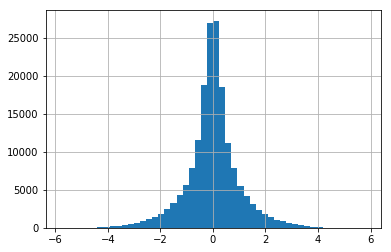

In [57]:
ty_scaler = tyScale()
scaled_set = ty_scaler.fit_transform(data)
scaled_set['seed_ty'].hist(bins=50)
print(scaled_set['seed_ty'].describe())

# 10.1 seed_x

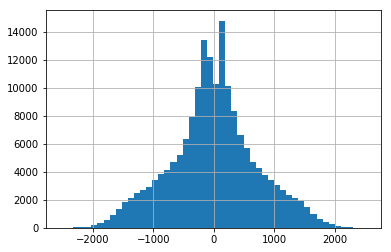

In [58]:
data['seed_x'].hist(bins=50)

In [59]:
data['seed_x'].describe()

count    175333.000000
mean         -4.854336
std         717.765492
min       -2530.684099
25%        -409.508038
50%          -6.429201
75%         401.981805
max        2505.171614
Name: seed_x, dtype: float64

#### 10.2 seed_x scaler

In [60]:
# %%writefile data_utils/xScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class xScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        x = data['seed_x']
        x -= np.mean(x)
        x /= np.std(x)
        data['seed_x'] = x
        return data

count    1.753330e+05
mean     1.868218e-17
std      1.000003e+00
min     -3.519028e+00
25%     -5.637703e-01
50%     -2.194127e-03
75%      5.668109e-01
max      3.497010e+00
Name: seed_x, dtype: float64


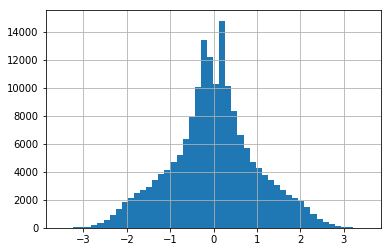

In [61]:
x_scaler = xScale()
scaled_set = x_scaler.fit_transform(data)
scaled_set['seed_x'].hist(bins=50)
print(scaled_set['seed_x'].describe())

# 11.1 seed_y

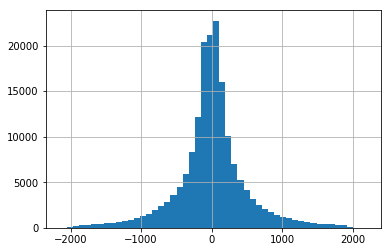

In [62]:
data['seed_y'].hist(bins=50)

In [63]:
data['seed_y'].describe()

count    175333.000000
mean          0.209695
std         505.751015
min       -2137.045914
25%        -196.567946
50%           1.851814
75%         197.470192
max        2180.362930
Name: seed_y, dtype: float64

#### 11.2 seed_y scaler

In [64]:
# %%writefile data_utils/yScale.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class yScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        y = data['seed_y']
        y -= np.mean(y)
        y /= np.std(y)
        data['seed_y'] = y
        return data

count    1.753330e+05
mean    -3.079925e-18
std      1.000003e+00
min     -4.225917e+00
25%     -3.890812e-01
50%      3.246900e-03
75%      3.900359e-01
max      4.310737e+00
Name: seed_y, dtype: float64


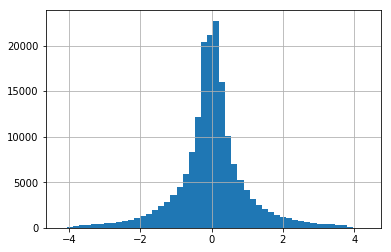

In [65]:
y_scaler = yScale()
scaled_set = y_scaler.fit_transform(data)
scaled_set['seed_y'].hist(bins=50)
print(scaled_set['seed_y'].describe())

# Adding feature R

In [66]:
# %%writefile data_utils/addR.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class addR(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        x = data['seed_x']
        y = data['seed_y']
        data['seed_r'] = np.sqrt(np.square(x) + np.square(y))
        data['seed_r'] -= np.mean(data['seed_r'] )
        data['seed_r'] /= np.std(data['seed_r'])
        return data

count    1.753330e+05
mean     5.089981e-17
std      1.000003e+00
min     -1.348148e+00
25%     -8.385337e-01
50%     -2.671745e-01
75%      6.512888e-01
max      4.497776e+00
Name: seed_r, dtype: float64

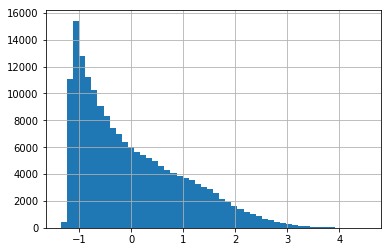

In [67]:
addr = addR()
data_w_r = addr.fit_transform(data)
data_w_r['seed_r'].hist(bins=50)
data_w_r['seed_r'].describe()

#  adding predicted z magnet 

In [68]:
# %%writefile data_utils/addZ.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class addZ(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data_unnormalized = (5376.8 - 3895.12* np.square(data['seed_ty']) + 309.877 * np.square(data['seed_tx']) + 89.901/data['seed_p']-4732)/(5870-4732)
        data['seed_z_magnet'] = (data_unnormalized - np.mean(data_unnormalized))
        return data

count    1.753330e+05
mean    -7.781876e-17
std      4.356435e-02
min     -4.525136e-01
25%     -1.156045e-02
50%     -7.828215e-03
75%      8.239039e-03
max      3.821652e-01
Name: seed_z_magnet, dtype: float64

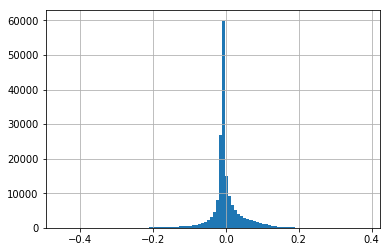

In [69]:
addz = addZ()
data_w_z = addz.fit_transform(data)
data_w_z['seed_z_magnet'].hist(bins=100)
data_w_z['seed_z_magnet'].describe()

# add pseudo rapidity

In [70]:
# %%writefile data_utils/addPR.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class addPR(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data['seed_pr'] = np.arctanh(data.seed_pt/ data.seed_p) 
        data['seed_pr'] -= np.mean(data['seed_pr'])
        data['seed_pr'] /= np.std(data['seed_pr'])
        return data

count    1.753330e+05
mean    -1.827692e-16
std      1.000003e+00
min     -1.281767e+00
25%     -8.189346e-01
50%     -2.911492e-01
75%      6.135731e-01
max      4.461897e+00
Name: seed_pr, dtype: float64

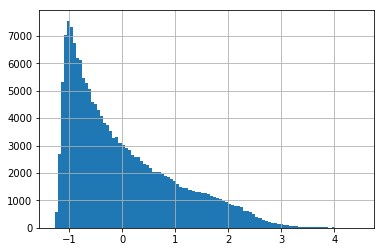

In [71]:
addpr = addPR()
data_w_pr = addpr.fit_transform(data)
data_w_pr['seed_pr'].hist(bins=100)
data_w_pr['seed_pr'].describe()

# add angle

In [72]:
# %%writefile data_utils/addAngle.py

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class addAngle(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data['seed_angle'] = np.arctan(data.seed_y/data.seed_x) 
        data['seed_angle'] /= np.std(data['seed_angle'])
        return data

count    175333.000000
mean          0.001744
std           1.000003
min          -2.171185
25%          -0.655604
50%           0.006078
75%           0.660048
max           2.171189
Name: seed_angle, dtype: float64

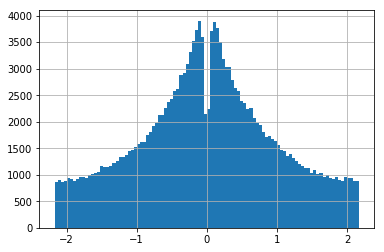

In [73]:
adda = addAngle()
data_w_pr = adda.fit_transform(data)
data_w_pr['seed_angle'].hist(bins=100)
data_w_pr['seed_angle'].describe()

In [1]:
# %%writefile data_pipeline.py

from sklearn.pipeline import Pipeline
from data_utils import *
def data_pipeline():
    num_pipeline = Pipeline([
        ('dropFalseMCParticles',dropFalseMCParticles()),
        ('dropUnnecessaryFeatures',dropUnnecessaryFeatures()),
        ('angle', addAngle()),
        ('pseudo rapidity', addPR()),
        ('z magnet',addZ()),
        ('radius', addR()),
        ('y',yScale()),
        ('x',xScale()),
        ('ty',tyScale()),
        ('tx',txScale()),
        ('nbIT',nbITScale()),
        ('nLayers',nLayersScale()),       
        ('nLHCbIDs',nLHCbIDsScale()),    
        ('pt', ptScale()),
        ('p', pScale()),
        ('chi2PerDoF', chi2PerDoFScaler()),            
    ])
    return num_pipeline

Overwriting data_pipeline.py


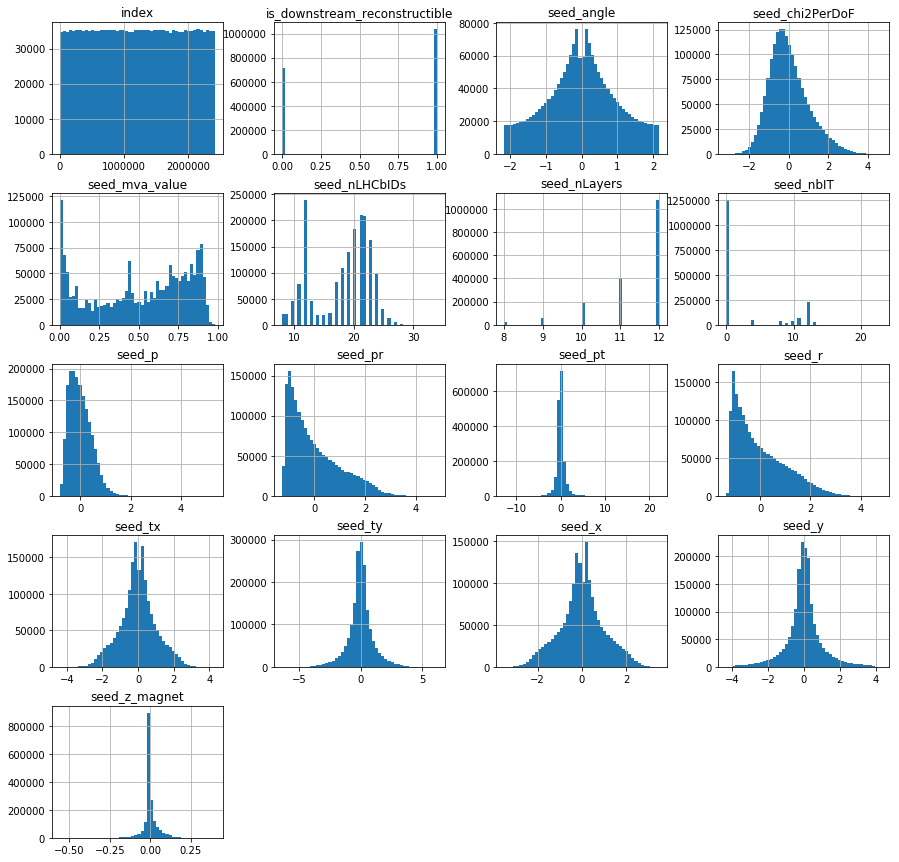

In [82]:
num_pipeline = data_pipeline()
final_scaled_set = num_pipeline.fit_transform(original_set)
%matplotlib inline
final_scaled_set.hist(bins=50, figsize=(15,15))
plt.show()

In [79]:
final_scaled_set.describe()

,index,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty,seed_mva_value,seed_angle,seed_pr,seed_z_magnet,seed_r
count,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06,1.754766e+06
mean,1.207430e+06,-4.887809e-17,9.559167e-16,-3.513505e-17,1.829986e+01,2.946159e+00,1.139345e+01,2.136569e-17,-1.467841e-18,2.174784e-17,5.063545e-18,5.050143e-01,2.048288e-03,3.141706e-16,4.150158e-16,-2.224801e-16
std,6.968938e+05,1.000000e+00,4.402673e-01,1.000000e+00,4.619977e+00,4.887125e+00,9.179167e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.044964e-01,1.000000e+00,1.000000e+00,4.339205e-02,1.000000e+00
min,2.000000e+00,-3.190166e+00,-8.130494e-01,-1.281297e+01,8.000000e+00,0.000000e+00,8.000000e+00,-3.521745e+00,-4.348355e+00,-4.388132e+00,-6.405702e+00,2.173314e-06,-2.175302e+00,-1.283144e+00,-5.581405e-01,-1.358372e+00
25%,6.043978e+05,-6.972411e-01,-3.450592e-01,-4.023946e-01,1.300000e+01,0.000000e+00,1.100000e+01,-5.633451e-01,-3.882457e-01,-5.567954e-01,-4.290885e-01,2.206260e-01,-6.548217e-01,-8.204188e-01,-1.150483e-02,-8.392304e-01
50%,1.207332e+06,-1.379448e-01,-6.403944e-02,-7.845366e-02,2.000000e+01,0.000000e+00,1.200000e+01,-2.985354e-03,2.193948e-03,-4.651818e-03,1.689706e-03,5.658112e-01,6.994498e-03,-2.913123e-01,-7.843026e-03,-2.692192e-01
75%,1.810731e+06,5.718125e-01,2.824612e-01,3.307583e-01,2.200000e+01,7.000000e+00,1.200000e+01,5.649904e-01,3.897217e-01,5.578255e-01,4.312300e-01,7.786093e-01,6.617818e-01,6.141151e-01,8.280145e-03,6.523295e-01
max,2.415199e+06,4.689938e+00,5.350478e+00,2.227019e+01,3.400000e+01,2.300000e+01,1.200000e+01,3.489079e+00,4.316771e+00,4.329194e+00,6.220838e+00,9.826049e-01,2.175302e+00,4.853417e+00,4.005927e-01,4.826987e+00


In [80]:
corr_matrix = final_scaled_set.drop(['index'],axis=1).corr()
corr_matrix

,is_downstream_reconstructible,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty,seed_mva_value,seed_angle,seed_pr,seed_z_magnet,seed_r
is_downstream_reconstructible,1.000000,0.003372,-0.137658,0.010949,0.372476,-0.349914,0.186348,0.007072,0.004796,0.008866,0.004094,0.614014,0.003318,0.110703,-0.016622,0.248411
seed_chi2PerDoF,0.003372,1.000000,-0.207434,-0.023368,0.119672,-0.282944,-0.207188,-0.005929,0.003456,-0.018040,0.002402,-0.100609,-0.001925,0.246989,0.126565,0.174672
seed_p,-0.137658,-0.207434,1.000000,0.458937,-0.531593,0.553032,0.030683,0.006392,-0.003432,0.016104,-0.002532,-0.068118,-0.001036,-0.813730,-0.415364,-0.593903
seed_pt,0.010949,-0.023368,0.458937,1.000000,0.041121,-0.054066,0.014297,-0.002664,-0.007531,0.006269,-0.007716,0.088468,-0.001702,-0.042500,-0.166664,0.135030
seed_nLHCbIDs,0.372476,0.119672,-0.531593,0.041121,1.000000,-0.842102,0.402053,-0.004813,0.003362,-0.006252,0.002815,0.491937,0.000111,0.533763,0.171992,0.577232
seed_nbIT,-0.349914,-0.282944,0.553032,-0.054066,-0.842102,1.000000,-0.031791,0.003457,-0.001358,0.008024,-0.000995,-0.447694,-0.001614,-0.526592,-0.113580,-0.585765
seed_nLayers,0.186348,-0.207188,0.030683,0.014297,0.402053,-0.031791,1.000000,0.031346,0.002022,0.036581,0.002131,0.254787,-0.003774,-0.077531,-0.046122,0.000723
seed_x,0.007072,-0.005929,0.006392,-0.002664,-0.004813,0.003457,0.031346,1.000000,0.002006,0.854131,0.006528,0.001817,0.000930,-0.012746,-0.004431,-0.006135
seed_y,0.004796,0.003456,-0.003432,-0.007531,0.003362,-0.001358,0.002022,0.002006,1.000000,0.002845,0.953250,0.003811,-0.007613,-0.002004,0.000544,-0.002306
seed_tx,0.008866,-0.018040,0.016104,0.006269,-0.006252,0.008024,0.036581,0.854131,0.002845,1.000000,0.008971,0.003432,0.001352,-0.020516,-0.004114,-0.012980


In [81]:
corr_matrix['is_downstream_reconstructible'].sort_values(ascending=False)

is_downstream_reconstructible    1.000000
seed_mva_value                   0.614014
seed_nLHCbIDs                    0.372476
seed_r                           0.248411
seed_nLayers                     0.186348
seed_pr                          0.110703
seed_pt                          0.010949
seed_tx                          0.008866
seed_x                           0.007072
seed_y                           0.004796
seed_ty                          0.004094
seed_chi2PerDoF                  0.003372
seed_angle                       0.003318
seed_z_magnet                   -0.016622
seed_p                          -0.137658
seed_nbIT                       -0.349914
Name: is_downstream_reconstructible, dtype: float64

#### 13. seed_y vs seed_x

In [ ]:
# data_sampled = data.sample(frac=0.25)

In [ ]:
# data_sampled.plot(kind='scatter', x='seed_x', y='seed_y', title='alpha=5e-3', alpha=1, figsize=(10,10), xlim=(-85,85),ylim=(-85,85))


In [ ]:
# data.plot(kind='scatter', x='seed_x', y='seed_y', title='alpha=5e-3', alpha=0.01, figsize=(10,10))
